In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import math
import random

In [2]:
images=[]
path = "/Data/Orange/"
path=os.getcwd()+path

for image in os.listdir(path):
    images.append(image)
random.seed(0)  
random.shuffle(images)
l=len(images)
test_images=images[0:int(l*0.3)]
images=images[int(l*0.3):]

In [3]:
im=cv2.imread("%s%s"%(path,'orange58.jpg'))

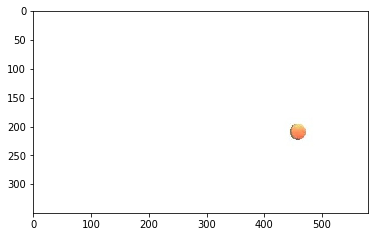

In [4]:
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

## AVG HISTOGRAM

In [5]:
histb=np.zeros((256,1))
histg=np.zeros((256,1))
histr=np.zeros((256,1))
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        b,g,r=cv2.split(image)
        bv=np.ravel(b)
        rv=np.ravel(r)
        gv=np.ravel(g)
        for i,col in enumerate(gv):
            if(not(col>220 and bv[i]>220 and rv[i]>240)):
                histg[col]+=1
                histb[bv[i]]+=1
                histr[rv[i]]+=1
                
histg=histg/len(images)
histr=histr/len(images)
histb=histb/len(images)

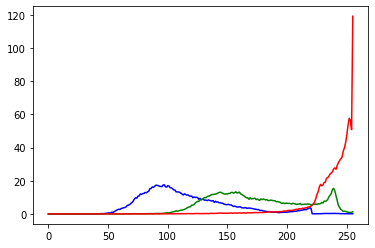

In [6]:
plt.plot(histb,color = 'b')
plt.plot(histg,color = 'g')
plt.plot(histr,color = 'r')
plt.show()

In [7]:
def Probabilty(x_co, mean, std):
    m=mean*np.ones((1,x_co.shape[0]))
    return (1 / (std * np.sqrt(2 * np.pi))) * (np.exp(-(np.square(x_co - m)) / (2 * (std) ** 2)))

In [8]:
pixelb=[]
pixelg=[]
pixelr=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        b,g,r=cv2.split(image)
        for i in range (b.shape[0]):
                   for j in range(b.shape[1]):
                                k=image[i,j]
                                if(not(k[0]>220 and k[2]>240 and k[1]>220)):
                                                                      pixelb.append(b[i,j])
                                                                      pixelg.append(g[i,j])
                                                                      pixelr.append(r[i,j])

pb=np.array(pixelb)
pg=np.array(pixelg)
pr=np.array(pixelr)

## GREEN CHANNEL

In [9]:
n = 0
mean1 = 200
mean2 = 150
# mean3 = 230

std1 = 10
std2 = 10
# std3 = 10
   

In [10]:
while (n != 50):
        p1 = Probabilty(pg,mean1,std1)
        p2 = Probabilty(pg, mean2, std2)
#         p3 = Probabilty(pg, mean3, std3)
        
        D=p1+ p2 
        b1=p1/D
        b2=p2/D
#         b3=p3/D
        
        mean1=np.sum(b1*pg)/(np.sum(b1))
        mean2=np.sum(b2*pg)/(np.sum(b2))
#         mean3=np.sum(b3*pg)/(np.sum(b3))
        
        std1=np.sqrt(np.sum(b1*np.square(pg-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(pg-mean2))/np.sum(b2))
#         std3=np.sqrt(np.sum(b3*np.square(pg-mean3))/np.sum(b3))
        n = n + 1

In [11]:
meang1=mean1
meang2=mean2
# meang3=mean3
stdg1=std1
stdg2=std2
# stdg3=std3

print('final mean- ',mean1,mean2)
print('final strd- ',std1, std2)

final mean-  207.976294227915 146.23692025521686
final strd-  26.33191382345803 19.748748166616583


## RED CHANNEL

In [12]:
n = 0
mean1 = 250
mean2 = 200
# mean3 = 190

std1 = 10
std2 = 10
# std3 = 10

In [13]:
while (n != 60):
        p1 = Probabilty(pr,mean1,std1)
        p2 = Probabilty(pr, mean2, std2)
#         p3 = Probabilty(pr, mean3, std3)
        
        D=p1+ p2
        b1=p1/D
        b2=p2/D
#         b3=p3/D
        
        mean1=np.sum(b1*pr)/(np.sum(b1))
        mean2=np.sum(b2*pr)/(np.sum(b2))
#         mean3=np.sum(b3*pr)/(np.sum(b3))
        
        std1=np.sqrt(np.sum(b1*np.square(pr-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(pr-mean2))/np.sum(b2))
#         std3=np.sqrt(np.sum(b3*np.square(pr-mean3))/np.sum(b3))
        n = n + 1

In [14]:
meanr1=mean1
meanr2=mean2
# meanr3=mean3
stdr1=std1
stdr2=std2
# stdr3=std3
print('final mean- ',mean1,mean2)
print('final strd- ',std1, std2)

final mean-  248.19692995512574 226.02350980372788
final strd-  5.679075231909899 25.024016085662378


## BLUE CHANNEL

In [15]:
n = 0
mean1 = 120
mean2 = 150
# mean3 = 150


std1 = 10
std2 = 10
# std3 = 10


In [16]:
while (n != 100):
        p1 = Probabilty(pb,mean1,std1)
        p2 = Probabilty(pb, mean2, std2)
#         p3 = Probabilty(pb, mean3, std3)       
        D=p1+ p2
        b1=p1/D
        b2=p2/D
#         b3=p3/D
        
        mean1=np.sum(b1*pb)/(np.sum(b1))
        mean2=np.sum(b2*pb)/(np.sum(b2))
#         mean3=np.sum(b3*pb)/(np.sum(b3))

        
        std1=np.sqrt(np.sum(b1*np.square(pb-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(pb-mean2))/np.sum(b2))
#         std3=np.sqrt(np.sum(b3*np.square(pb-mean3))/np.sum(b3))

        n = n + 1

In [17]:
meanb1=mean1
meanb2=mean2
# meanb3=mean3
stdb1=std1
stdb2=std2
# stdb3=std3
print('final mean- ',mean1,mean2)
print('final strd- ',std1, std2)

final mean-  93.84804665093125 136.6133941656622
final strd-  16.939099200786515 38.30984339498762


## GAUSSIAN PLOT

0.023550616495831792
0.010413040919378419
0.015150517406687741
0.020199435929403636
0.0702055319611639
0.015942369241389906


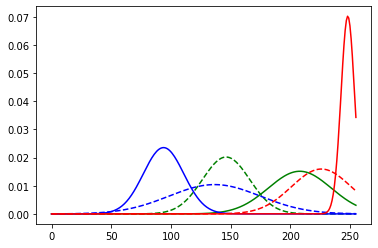

In [18]:
def gaussian(x, mu, sig):
    return ((1/(sig*math.sqrt(2*math.pi)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))


x=list(range(0, 256))


mg1=np.array([meang1])
mg2=np.array([meang2])
# mg3=np.array([meang3])
sg1=np.array([stdg1])
sg2=np.array([stdg2])
# sg3=np.array([stdg3])

g1=gaussian(x, mg1, sg1)
g2=gaussian(x, mg2, sg2)
# g3=gaussian(x, mg3, sg3)

plt.plot(g1, 'g', linestyle='-')
plt.plot(g2, 'g', linestyle='--')
# plt.plot(g3, 'g', linestyle=':')



mr1=np.array([meanr1])
mr2=np.array([meanr2])
# mr3=np.array([meanr3])
sr1=np.array([stdr1])
sr2=np.array([stdr2])
# sr3=np.array([stdr3])

r1=gaussian(x, mr1, sr1)
r2=gaussian(x, mr2, sr2)
# r3=gaussian(x, mr3, sr3)

mb1=np.array([meanb1])
mb2=np.array([meanb2])
# mb3=np.array([meanb3])
sb1=np.array([stdb1])
sb2=np.array([stdb2])
# sb3=np.array([stdb3])


b1=gaussian(x, mb1, sb1)
b2=gaussian(x, mb2, sb2)
# b3=gaussian(x, mb3, sb3)

plt.plot(b1, 'b', linestyle='-')
plt.plot(b2, 'b', linestyle='--')
# plt.plot(b3, 'b', linestyle=':')
print(max(b1))
print(max(b2))
# print(max(b3))

print(max(g1))
print(max(g2))
# print(max(g3))

print(max(r1))
print(max(r2))
# print(max(r3))

plt.plot(r1, 'r',linestyle='-')
plt.plot(r2, 'r',linestyle='--')
# plt.plot(r3, 'r',linestyle=':')
plt.show()


## TRIAL IMAGE SEGMENTATION

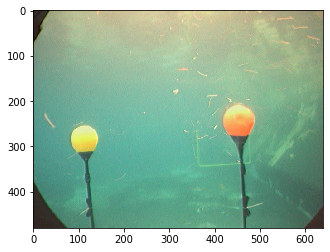

In [32]:
image=cv2.imread('frame.jpg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))


In [33]:
print(max(b1))
print(max(b2))
# print(max(b3))

print(max(g1))
print(max(g2))
# print(max(g3))

print(max(r1))
print(max(r2))
# print(max(r3))

0.023550616495831792
0.010413040919378419
0.015150517406687741
0.020199435929403636
0.0702055319611639
0.015942369241389906


In [34]:
# image_g=image[:,:,1]
# image_r=image[:,:,2]
# image_b=image[:,:,0]
b,g,r=cv2.split(image)
img_out3=np.zeros(g.shape, dtype = np.uint8)

for index, v in np.ndenumerate(r):
    x=b[index]
    y=g[index]
    if (r1[v]>0.065 and (b2[x]>0.009 or b1[x]>0.018)):
#     if (r1[v]>0.065) :

                            img_out3[index]=255
    else:
                            img_out3[index]=0  
    

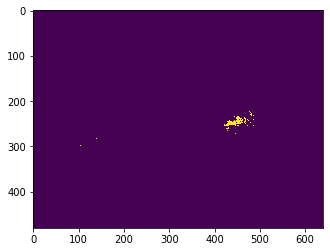

In [35]:
plt.imshow(img_out3)

In [36]:
ret, threshold3 = cv2.threshold(img_out3, 240, 255, cv2.THRESH_BINARY)
kernel3 = np.ones((2,2),np.uint8)
    
dilation3 = cv2.dilate(threshold3,kernel3,iterations =6)
contours3, _= cv2.findContours(dilation3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
for contour in contours3:
            if cv2.contourArea(contour) > 20:
                (x,y),radius = cv2.minEnclosingCircle(contour)
                center = (int(x),int(y))
                radius = int(radius)
#                 print(radius)
                if radius > 13:
                    print(radius)
                    cv2.circle(image,center,radius,(0,0,255),2)

38


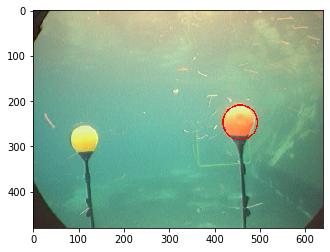

In [37]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))